<a href="https://colab.research.google.com/github/SaurabhVaze/sales-prediction/blob/main/Project_1_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 3

Saurabh Vaze

06/09/22

#Parts 1+2


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sales_df = pd.read_csv('/content/sales_predictions.csv')

In [23]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
sales_df.shape # 1. number of rows/columns

(8523, 12)

In [25]:
sales_df.info()  # 2. What are the datatypes of each variable?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
sales_df.duplicated().sum()        # 3. Are there duplicates? If so, drop any duplicates.

0

In [27]:
sales_df.isna().sum()      # 4. Identify missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
# 5. Decide on how to address the missing values and do it! 
sales_df.groupby(['Outlet_Type'])['Outlet_Size'].value_counts() #find possible correlation between outlet type and size (which has many missing values)


Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [29]:
sales_df.drop(columns='Outlet_Size', inplace=True) #Drop Outlet Size column because Outlet_Type can reflect similar insight with high correlation regarding size of the store

In [30]:
mean_weight= sales_df['Item_Weight'].mean() # Replace missing Item Weight with Column average
sales_df['Item_Weight'].fillna(mean_weight, inplace=True)

In [31]:
sales_df.isna().sum() # 6. No remaining missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
sales_df.sample(50) #find columns with irregular column values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8406,FDM38,5.885000,Regular,0.092771,Canned,54.1982,OUT046,1997,Tier 1,Supermarket Type1,999.3658
140,NCC31,8.020000,Low Fat,0.019867,Household,154.5972,OUT035,2004,Tier 2,Supermarket Type1,1402.1748
7040,FDD21,10.300000,Regular,0.000000,Fruits and Vegetables,115.7176,OUT017,2007,Tier 2,Supermarket Type1,1717.7640
3007,FDF24,12.857645,Regular,0.025248,Baking Goods,81.9934,OUT027,1985,Tier 3,Supermarket Type3,3439.5228
4741,FDQ48,14.300000,Regular,0.034606,Baking Goods,95.9726,OUT017,2007,Tier 2,Supermarket Type1,2153.1972
3761,FDP03,5.150000,Regular,0.102398,Meat,122.1388,OUT010,1998,Tier 3,Grocery Store,495.3552
1319,FDT58,9.000000,Low Fat,0.143871,Snack Foods,169.4816,OUT010,1998,Tier 3,Grocery Store,503.3448
4638,FDW23,5.765000,Low Fat,0.081997,Baking Goods,40.1164,OUT035,2004,Tier 2,Supermarket Type1,540.6296
7554,FDZ22,12.857645,Low Fat,0.079262,Snack Foods,81.8250,OUT019,1985,Tier 1,Grocery Store,83.2250
6024,NCA29,10.500000,LF,0.045655,Household,169.8106,OUT010,1998,Tier 3,Grocery Store,171.1106


In [33]:
sales_df['Item_Fat_Content'].value_counts() # irregular labelling in Fat Content classification

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
sales_df['Item_Fat_Content']= sales_df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')  #replace 'LF' and 'low fat' labels


In [35]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('reg', 'Regular') # Replace 'reg' label

In [36]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
nums = sales_df.filter(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], axis = 1) # new df of only numerical columns from sales_df

In [38]:
nums.describe().round(2) # statistics of numerical columns

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,2181.29
std,4.23,0.05,62.28,1706.50
min,4.56,0.00,31.29,33.29
25%,9.31,0.03,93.83,834.25
50%,12.86,0.05,143.01,1794.33
75%,16.00,0.09,185.64,3101.30
max,21.35,0.33,266.89,13086.96


In [39]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


#Part 3: Data Viz

In [53]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


Text(0.5, 1.0, 'Item weight Histogram')

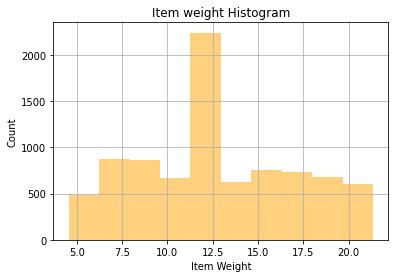

In [57]:
sales_df['Item_Weight'].hist(color='orange', alpha = 0.5 ) #Histogram
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.title('Item weight Histogram')

[Text(0.5, 1.0, 'Item Fat Content vs MRP')]

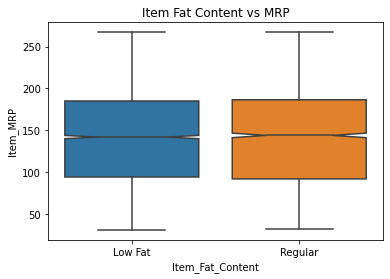

In [63]:
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', notch = True, data=sales_df).set(title='Item Fat Content vs MRP') # boxplot



[Text(0.5, 1.0, 'Sales Predictions Correlation Heatmap')]

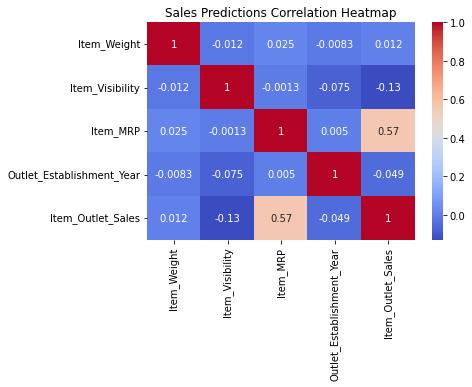

In [72]:
corr = sales_df.corr() #heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True).set(title = 'Sales Predictions Correlation Heatmap')

